**Description**: The dataset is based on the data from the 1994 U.S. Census database and includes only records that meet certain criteria. These criteria include: individuals must be over 16 years old, have an adjusted gross income over 100, a final weight greater than one, and work more than zero hours per week (((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)))

**Predicting Task**: The main goal of this dataset is to predict whether a person’s income is above $50,000 per year.

**Target Variables**: Gender and Race

In [10]:
Dataset_1 = "/content/drive/MyDrive/Fairness and Bias (Sensitive Features)"

Data = "/content/drive/MyDrive/Fairness and Bias (Sensitive Features)/cleaned_engineered_adult.csv"
df = pd.read_csv(Data)

**Dataset Visualization**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Settig the style
sns.set_style("whitegrid")

<ipython-input-20-fa1847cb0ad6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='race', data=df, palette='Set1')


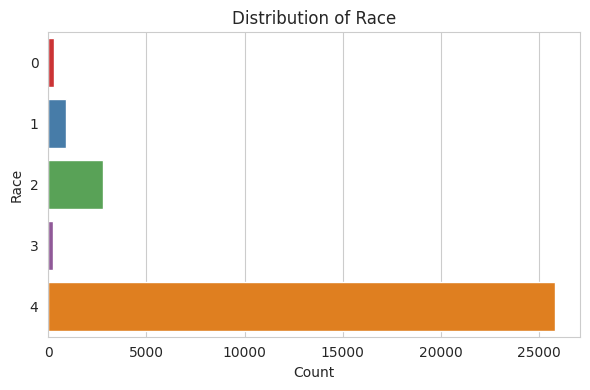

In [20]:
# Bar plot of Race
plt.figure(figsize=(6, 4))
sns.countplot(y='race', data=df, palette='Set1')
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

<ipython-input-19-7c8ad891753a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set1')


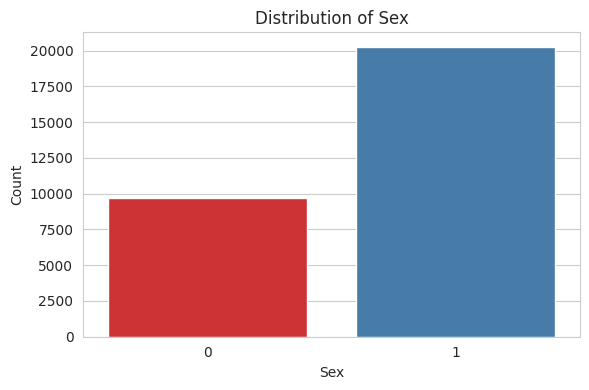

In [19]:
# Bar plot of Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='Set1')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

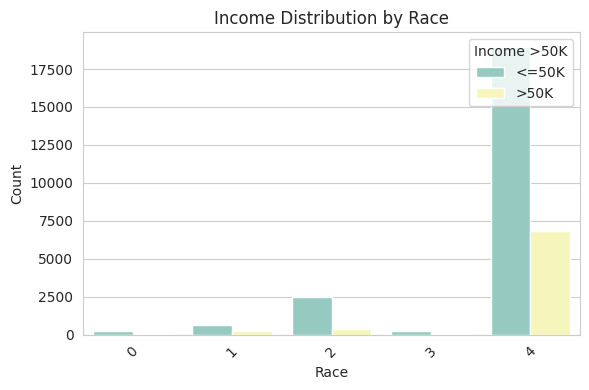

In [22]:
# Income distribution by race
plt.figure(figsize=(6, 4))
sns.countplot(x='race', hue='income', data=df, palette='Set3')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income >50K', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, recall_score, accuracy_score

In [24]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.238510,Private,-0.468746,7th-8th,-2.409308,Divorced,Machine-op-inspct,Unmarried,4,0,-0.147027,9.448624,-0.083814,United-States,<=50K
1,0.219781,Private,0.706710,Some-college,-0.049553,Separated,Prof-specialty,Own-child,4,0,-0.147027,9.448624,-0.083814,United-States,<=50K
2,-0.328766,Private,0.254708,HS-grad,-0.442846,Divorced,Other-service,Unmarried,4,0,-0.147027,9.126380,0.335593,United-States,<=50K
3,-0.015311,Private,-0.371895,10th,-1.622723,Separated,Adm-clerical,Unmarried,4,1,-0.147027,9.126380,-0.083814,United-States,<=50K
4,2.805786,State-gov,-0.957835,Doctorate,2.310201,Never-married,Prof-specialty,Other-relative,4,0,-0.147027,8.910724,-1.761443,United-States,>50K


In [25]:
# Preparing the data for modeling
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [26]:
# Define the features and target variable
X = df.drop('income_>50K', axis=1)  # assuming 'income_>50K' is the target variable
y = df['income_>50K']

**Splitting the data**

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Selection and Training**
We'll explore different models (Logistic Regression, Decision Tree, Random Forest)

In [29]:
# Importing Models and metrics

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Create model instances and random state reproducibility

logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

### **Logistic Regression**

In [41]:
logistic_regression.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Training the model to make predictions on the scaled data
y_pred_logistic_regression = logistic_regression.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test_scaled)

In [43]:
# Evaluate the models
print("Logistic Regression Model Evaluation")
print(classification_report(y_test, y_pred_logistic_regression))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_regression))

Logistic Regression Model Evaluation
              precision    recall  f1-score   support

       False       0.87      0.93      0.90      4514
        True       0.73      0.59      0.65      1485

    accuracy                           0.84      5999
   macro avg       0.80      0.76      0.78      5999
weighted avg       0.84      0.84      0.84      5999

Accuracy: 0.8449741623603934


**Vusualizing the outcomes in the form of Confusion Matrix and Precision-Recall Curve**

In [44]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

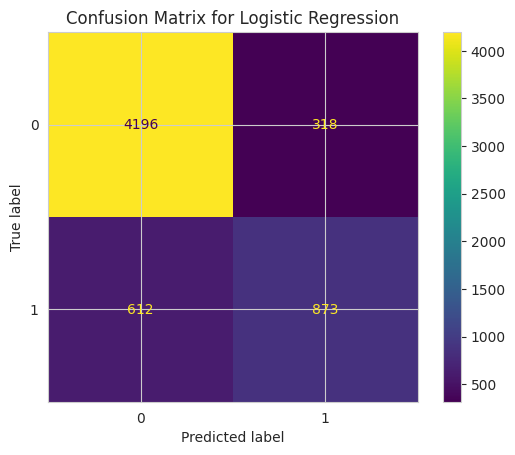

In [45]:
plot_confusion_matrix(y_test, y_pred_logistic_regression, "Logistic Regression")

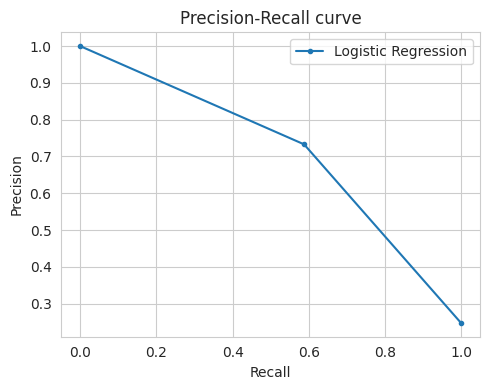

In [46]:
# precision and recall calculation
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logistic_regression)

# Plot
plt.figure(figsize = (5, 4))
plt.plot(recall, precision, marker = ".", label = "Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()

plt.tight_layout()
plt.show()

### **Decision Tree**

In [48]:
# Evaluate the models
print("Decision Tree Model Evaluation")
print(classification_report(y_test, y_pred_decision_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

Decision Tree Model Evaluation
              precision    recall  f1-score   support

       False       0.86      0.95      0.90      4514
        True       0.77      0.52      0.62      1485

    accuracy                           0.84      5999
   macro avg       0.82      0.73      0.76      5999
weighted avg       0.84      0.84      0.83      5999

Accuracy: 0.8431405234205701


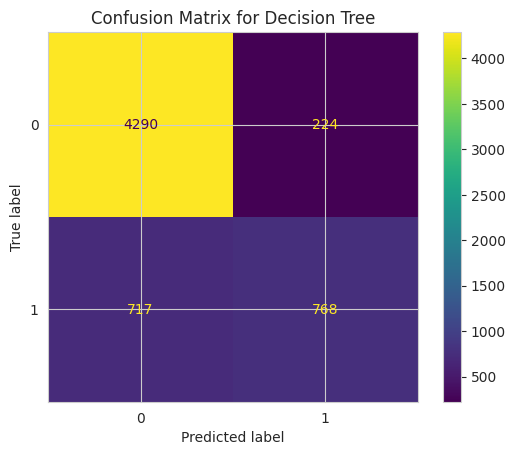

In [49]:
# Plotting Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_decision_tree, 'Decision Tree')

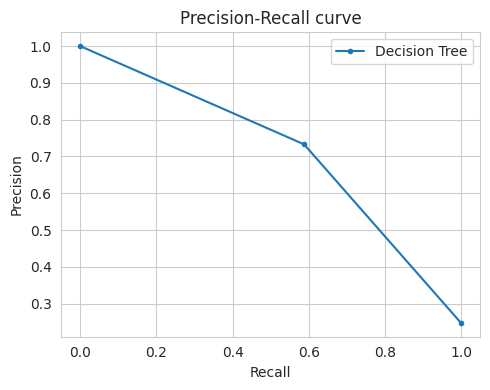

In [50]:
# precision and recall calculation
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logistic_regression)

# Plot
plt.figure(figsize = (5, 4))
plt.plot(recall, precision, marker = ".", label = "Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()

plt.tight_layout()
plt.show()

### **Random Forest**

In [51]:
# Evaluate the models
print("Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_random_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))

Random Forest Model Evaluation
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      4514
        True       0.73      0.62      0.67      1485

    accuracy                           0.85      5999
   macro avg       0.81      0.77      0.79      5999
weighted avg       0.84      0.85      0.85      5999

Accuracy: 0.8501416902817136


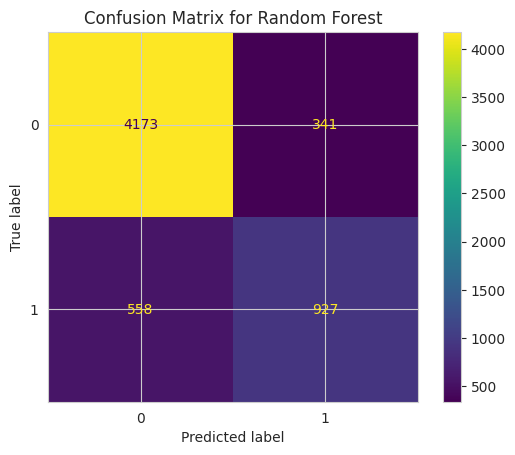

In [52]:
# Plotting Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_random_forest, 'Random Forest')

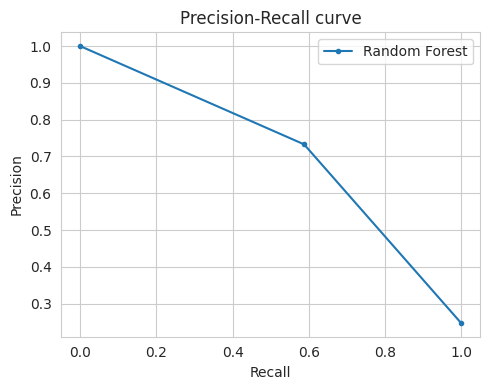

In [53]:
# precision and recall calculation
plt.figure(figsize = (5, 4))
plt.plot(recall, precision, marker = ".", label = "Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()

plt.tight_layout()
plt.show()

## **Model Comparison**

In [54]:
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.8449},
    {"Model": "Decision Tree", "Accuracy": 0.8431},
    {"Model": "Random Forest", "Accuracy": 0.8501},
]

results_dataset = pd.DataFrame(results)
results_dataset = results_dataset.sort_values(by = "Accuracy", ascending = False)
results_dataset

,Model,Accuracy
2,Random Forest,0.8501
0,Logistic Regression,0.8449
1,Decision Tree,0.8431


## **Calculating Fairness Metrix**

In [55]:
# Define a function to calculate fairness metrics
def fairness_metrics(y_true, y_pred, sensitive_features):
    results = {}
    for feature_name, sensitive_data in sensitive_features.items():
        # Demographic Parity
        dp_groups = y_pred[sensitive_data == 1].mean() - y_pred[sensitive_data == 0].mean()
        # Equal Opportunity
        eo_groups = (y_pred[(y_true == 1) & (sensitive_data == 1)].mean() -
                     y_pred[(y_true == 1) & (sensitive_data == 0)].mean())

        results[feature_name] = {'Demographic Parity': dp_groups, 'Equal Opportunity': eo_groups}

    return results

# Sensitive features mapping
sensitive_features = {
    'sex': X_test['sex'],
    'race': X_test['race']
}

# Calculate and print fairness metrics for each sensitive feature
fairness_results = fairness_metrics(y_test, y_pred_logistic_regression, sensitive_features)
for feature, metrics in fairness_results.items():
    print(f"Fairness Metrics for {feature}:")
    print(f"  Demographic Parity Difference: {metrics['Demographic Parity']:.4f}")
    print(f"  Equal Opportunity Difference: {metrics['Equal Opportunity']:.4f}")

Fairness Metrics for sex:
  Demographic Parity Difference: 0.1824
  Equal Opportunity Difference: 0.1354
Fairness Metrics for race:
  Demographic Parity Difference: 0.1278
  Equal Opportunity Difference: -0.2286


**Visualizing the Results**

<ipython-input-56-3c3e57ec18d9>:16: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  barplot = sns.barplot(x='Feature', y='Value', hue='Metric', data=df_fairness, palette=palette)


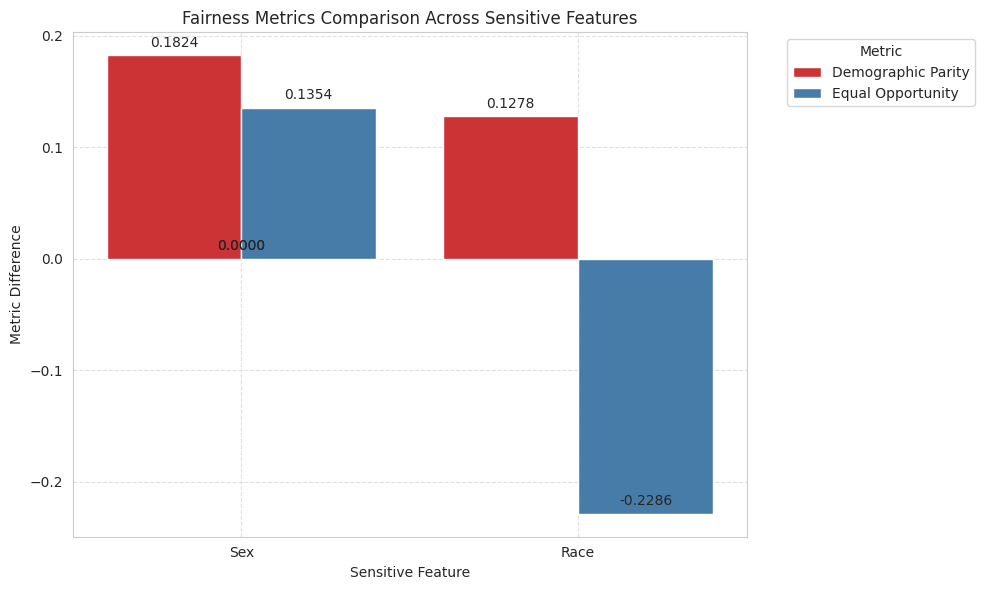

In [56]:
# Data for fairness metrics
fairness_data = {
    'Feature': ['Sex', 'Sex', 'Race', 'Race'],
    'Metric': ['Demographic Parity', 'Equal Opportunity', 'Demographic Parity', 'Equal Opportunity'],
    'Value': [0.1824, 0.1354, 0.1278, -0.2286]
}

# Creating a DataFrame
df_fairness = pd.DataFrame(fairness_data)

# Define a color palette
palette = sns.color_palette("Set1")

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Feature', y='Value', hue='Metric', data=df_fairness, palette=palette)
plt.title('Fairness Metrics Comparison Across Sensitive Features')
plt.ylabel('Metric Difference')
plt.xlabel('Sensitive Feature')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate bars with their values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [57]:
# Define a function to calculate fairness metrics
def fairness_metrics(y_true, y_pred, sensitive_features):
    results = {}
    for feature_name, sensitive_data in sensitive_features.items():

        p_group = y_pred[sensitive_data == 1].mean()
        p_nongroup = y_pred[sensitive_data == 0].mean()


        demographic_parity_difference = p_group - p_nongroup


        true_positive_group = y_pred[(y_true == 1) & (sensitive_data == 1)].mean()
        true_positive_nongroup = y_pred[(y_true == 1) & (sensitive_data == 0)].mean()
        equal_opportunity_difference = true_positive_group - true_positive_nongroup

        results[feature_name] = {
            'Demographic Parity': demographic_parity_difference,
            'Equal Opportunity': equal_opportunity_difference
        }

    return results

sensitive_features = {
    'sex': X_test['sex'],
    'race': X_test['race']
}


fairness_results_logistic = fairness_metrics(y_test, y_pred_logistic_regression, sensitive_features)
fairness_results_decision_tree = fairness_metrics(y_test, y_pred_decision_tree, sensitive_features)
fairness_results_random_forest = fairness_metrics(y_test, y_pred_random_forest, sensitive_features)

# Printing results for each sensitive feature across models
for model_name, fairness_results in [('Logistic Regression', fairness_results_logistic),
                                     ('Decision Tree', fairness_results_decision_tree),
                                     ('Random Forest', fairness_results_random_forest)]:
    print(f"Fairness Metrics for {model_name}:")
    for feature, metrics in fairness_results.items():
        print(f"  {feature} - Demographic Parity Difference: {metrics['Demographic Parity']:.4f}")
        print(f"  {feature} - Equal Opportunity Difference: {metrics['Equal Opportunity']:.4f}")
        print()

Fairness Metrics for Logistic Regression:
  sex - Demographic Parity Difference: 0.1824
  sex - Equal Opportunity Difference: 0.1354

  race - Demographic Parity Difference: 0.1278
  race - Equal Opportunity Difference: -0.2286

Fairness Metrics for Decision Tree:
  sex - Demographic Parity Difference: 0.1555
  sex - Equal Opportunity Difference: 0.1293

  race - Demographic Parity Difference: 0.1017
  race - Equal Opportunity Difference: -0.1571

Fairness Metrics for Random Forest:
  sex - Demographic Parity Difference: 0.1948
  sex - Equal Opportunity Difference: 0.1069

  race - Demographic Parity Difference: 0.1117
  race - Equal Opportunity Difference: -0.2048



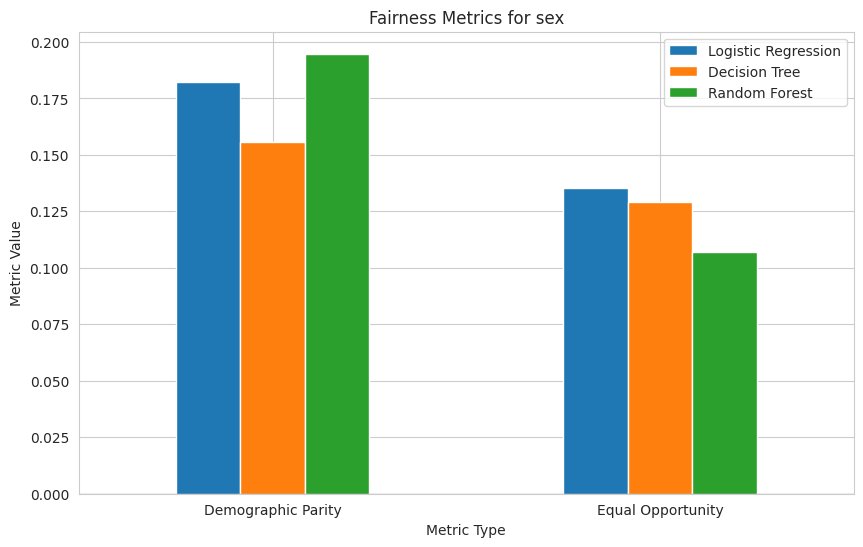

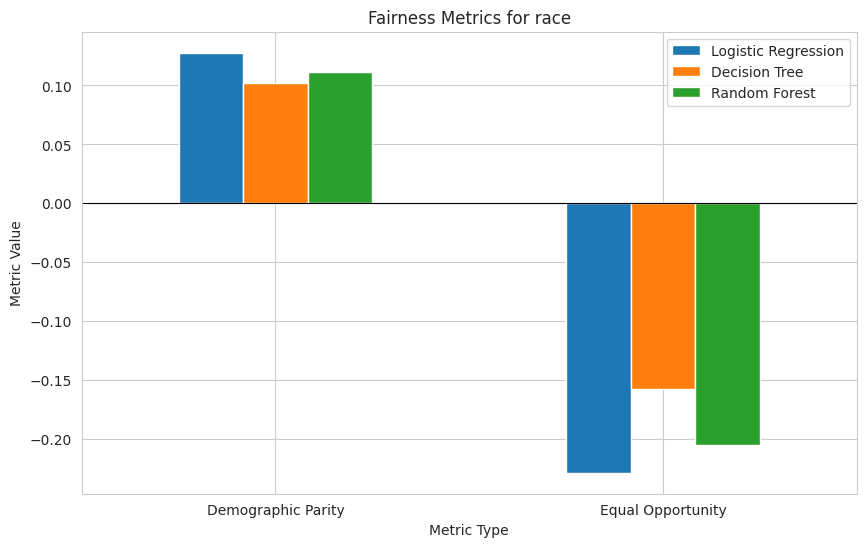

In [58]:
# Function to calculate fairness metrics
def fairness_metrics_and_visualization(y_true, y_pred_dict, sensitive_features):
    results = {}
    for model_name, y_pred in y_pred_dict.items():
        model_results = {}
        for feature_name, sensitive_data in sensitive_features.items():

            p_group = y_pred[sensitive_data == 1].mean()
            p_nongroup = y_pred[sensitive_data == 0].mean()


            demographic_parity_difference = p_group - p_nongroup


            true_positive_group = y_pred[(y_true == 1) & (sensitive_data == 1)].mean()
            true_positive_nongroup = y_pred[(y_true == 1) & (sensitive_data == 0)].mean()
            equal_opportunity_difference = true_positive_group - true_positive_nongroup

            model_results[feature_name] = {
                'Demographic Parity': demographic_parity_difference,
                'Equal Opportunity': equal_opportunity_difference
            }
        results[model_name] = model_results

    # Visualization
    for feature_name in sensitive_features.keys():
        fig, ax = plt.subplots(figsize=(10, 6))
        metrics_df = pd.DataFrame({
            model_name: {metric_name: results[model_name][feature_name][metric_name]
                         for metric_name in ['Demographic Parity', 'Equal Opportunity']}
            for model_name in results
        })

        metrics_df.plot(kind='bar', ax=ax)
        ax.set_title(f'Fairness Metrics for {feature_name}')
        ax.set_ylabel('Metric Value')
        ax.set_xlabel('Metric Type')
        ax.axhline(0, color='black', linewidth=0.8)
        plt.xticks(rotation=0)
        plt.show()

    return results


y_pred_dict = {
    'Logistic Regression': y_pred_logistic_regression,
    'Decision Tree': y_pred_decision_tree,
    'Random Forest': y_pred_random_forest
}

fairness_results = fairness_metrics_and_visualization(y_test, y_pred_dict, sensitive_features)



---